In [92]:
# Importing packages
import os
import pandas as pd
import sklearn as sk
import seaborn as sns
import seaborn.objects as so
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

## Read in labels

In [23]:
# Read labels
labels = pd.read_csv("../labels/all.csv")
labels.shape

(84286, 3)

## Split dataset into train and test dataset

The entire dataset consist of 23 images in total, let's take 3 images for test and the rest 20 for training.  
This will avoid data leakage between the training/validation and the test sets.    

In [24]:
# Let's add a column on the labels that represents the dataset
labels["file"] = labels["image"].apply(lambda x: x.split("_")[0]).astype("category")

# Make the values in the file column categorical
labels.groupby("file", observed=True).count()

,image,count,label
file,,,
s01c1,1837,1837,1837
s02c1,2245,2245,2245
s03c1,1734,1734,1734
s04c1,5306,5306,5306
s05c1,4590,4590,4590
s06c1,4373,4373,4373
s10c1,3049,3049,3049
s11c1,3805,3805,3805
s12c1,3337,3337,3337


/tmp/ipykernel_34175/1663668403.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  g=sns.barplot(data=labels.groupby("file").count(), x="file", y="label")
/tmp/ipykernel_34175/1663668403.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(g.get_xticklabels(), rotation=45)


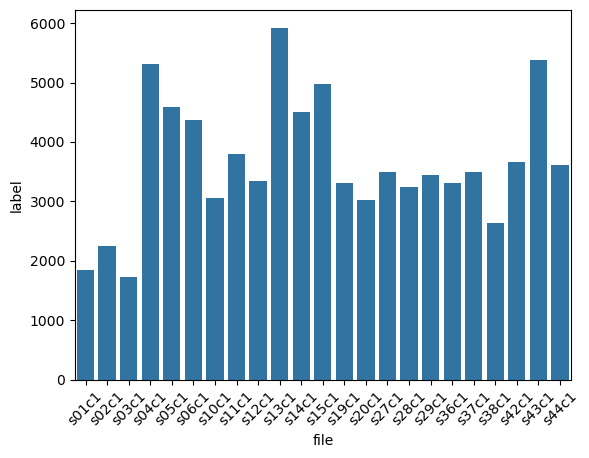

In [121]:
g=sns.barplot(data=labels.groupby("file").count(), x="file", y="label")
g.set_xticklabels(g.get_xticklabels(), rotation=45)
plt.show()

In [25]:
# Subset s03c1, s01c1 and s02c1 as test. We use the rest for training
test = labels[labels["file"].isin(["s03c1","s01c1","s02c1"])]
test.shape

train = labels[~labels["file"].isin(["s03c1","s01c1","s02c1"])]
train.shape

(78470, 4)

In [95]:
proportions = pd.DataFrame(labels.groupby(["file"], observed=True).apply(lambda x: x["label"].value_counts()/len(x), include_groups=False).stack())
proportions.rename(columns={0:"counts"}, inplace=True)
proportions.reset_index(inplace=True)
proportions

,file,label,counts
0,s01c1,0,0.890582
1,s01c1,1,0.109418
2,s02c1,0,0.886860
3,s02c1,1,0.113140
4,s03c1,0,0.884083
5,s03c1,1,0.115917
6,s04c1,0,0.922917
7,s04c1,1,0.077083
8,s05c1,0,0.947712
9,s05c1,1,0.052288


/tmp/ipykernel_34175/3500371112.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(g.get_xticklabels(), rotation=45)


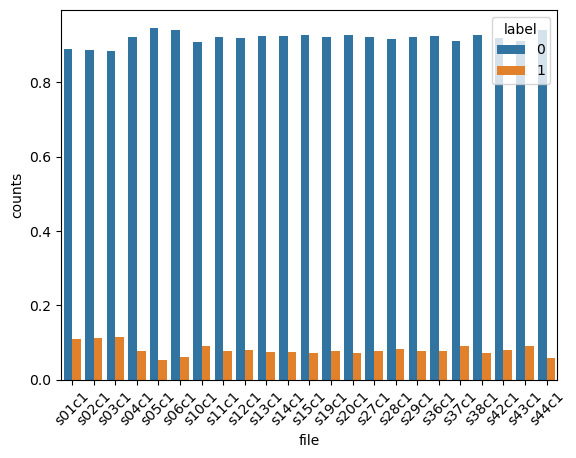

In [104]:
# Plotting the proportion of cells with CIN vs no CIN
g=sns.barplot(data=proportions, x="file", y="counts", hue="label")
g.set_xticklabels(g.get_xticklabels(), rotation=45)
plt.show()

In [22]:
# Save the training and testing labels
test = test.drop("file", axis=1)
test.to_csv("../labels/test.csv", index=False)

train = train.drop("file", axis=1)
train.to_csv("../labels/train.csv", index=False)